In [1]:
import sys
src_path = "..\\src"
src_path_2 = "..\\venv"

sys.path.append('C:/Users/janse/OneDrive/Dokumenter/4. Semester/Anvendt programmering/Milj-dataanalyse/venv7Lib/site-packages')
sys.path.append('C:/Users/janse/AppData/Local/Programs/Python/Python312/Lib/site-packages')

if src_path not in sys.path:
        sys.path.insert(0, src_path)

if src_path_2 not in sys.path:
        sys.path.insert(0, src_path_2)


# Alle funskjonene ligger i en felles fil
import functions as fc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from pandasql import sqldf
from matplotlib.widgets import CheckButtons
from sklearn.metrics import mean_squared_error, r2_score

import functions as fc

# Forberedelser
### Last ned datasettet

In [2]:
# Hente frem datasettet og kaller det wind
wind = pd.read_csv('../data/wind.csv')

# Dobbelskjekket at dataen har kommet, ved å vise de første 5 linjene
wind.head()

,Unnamed: 0,verdi,tidsforskyvning,referansetid
0,0,6.9,PT0H,2024-01-01T00:00:00.000Z
1,1,6.3,PT0H,2024-01-02T00:00:00.000Z
2,2,5.4,PT0H,2024-01-03T00:00:00.000Z
3,3,4.8,PT0H,2024-01-04T00:00:00.000Z
4,4,1.9,PT0H,2024-01-05T00:00:00.000Z


# Forstå data
Se hvilke datatyper vi har og blir mere kjent med datasettet, for å gjøre det lettere å jobbe med senere.

In [3]:
# Skjekker hvilke datatype refaransetid er
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       730 non-null    int64  
 1   verdi            730 non-null    float64
 2   tidsforskyvning  730 non-null    object 
 3   referansetid     730 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 22.9+ KB


I dette datasettet har vi integer, float og object som er string.

In [4]:
# forstå dataen
print('type:', type(wind))
print('shape:', wind.shape)

type: <class 'pandas.core.frame.DataFrame'>
shape: (730, 4)


### Verdier

In [5]:
# den minste og største verdien
print("Den minste verdien er", wind['verdi'].min())
print("Den største verdien er", wind['verdi'].max())

Den minste verdien er 0.6
Den største verdien er 11.4


In [6]:
# 10 tilfelige verdier
wind.sample(10)

,Unnamed: 0,verdi,tidsforskyvning,referansetid
224,224,1.7,PT0H,2024-08-12T00:00:00.000Z
443,443,3.2,PT0H,2024-03-19T00:00:00.000Z
82,82,3.0,PT0H,2024-03-23T00:00:00.000Z
207,207,2.5,PT0H,2024-07-26T00:00:00.000Z
29,29,0.9,PT0H,2024-01-30T00:00:00.000Z
518,518,2.3,PT0H,2024-06-02T00:00:00.000Z
302,302,1.6,PT0H,2024-10-29T00:00:00.000Z
675,675,4.1,PT0H,2024-11-06T00:00:00.000Z
395,395,4.8,PT0H,2024-01-31T00:00:00.000Z
320,320,5.6,PT0H,2024-11-16T00:00:00.000Z


In [7]:
# de siste verdiene
wind.tail()

,Unnamed: 0,verdi,tidsforskyvning,referansetid
725,725,6.6,PT0H,2024-12-26T00:00:00.000Z
726,726,4.3,PT0H,2024-12-27T00:00:00.000Z
727,727,6.2,PT0H,2024-12-28T00:00:00.000Z
728,728,6.2,PT0H,2024-12-29T00:00:00.000Z
729,729,6.1,PT0H,2024-12-30T00:00:00.000Z


# Manglende verdier

Unnamed: 0         0
verdi              0
tidsforskyvning    0
referansetid       0
dtype: int64
Empty DataFrame
Columns: [Unnamed: 0, verdi, tidsforskyvning, referansetid]
Index: []


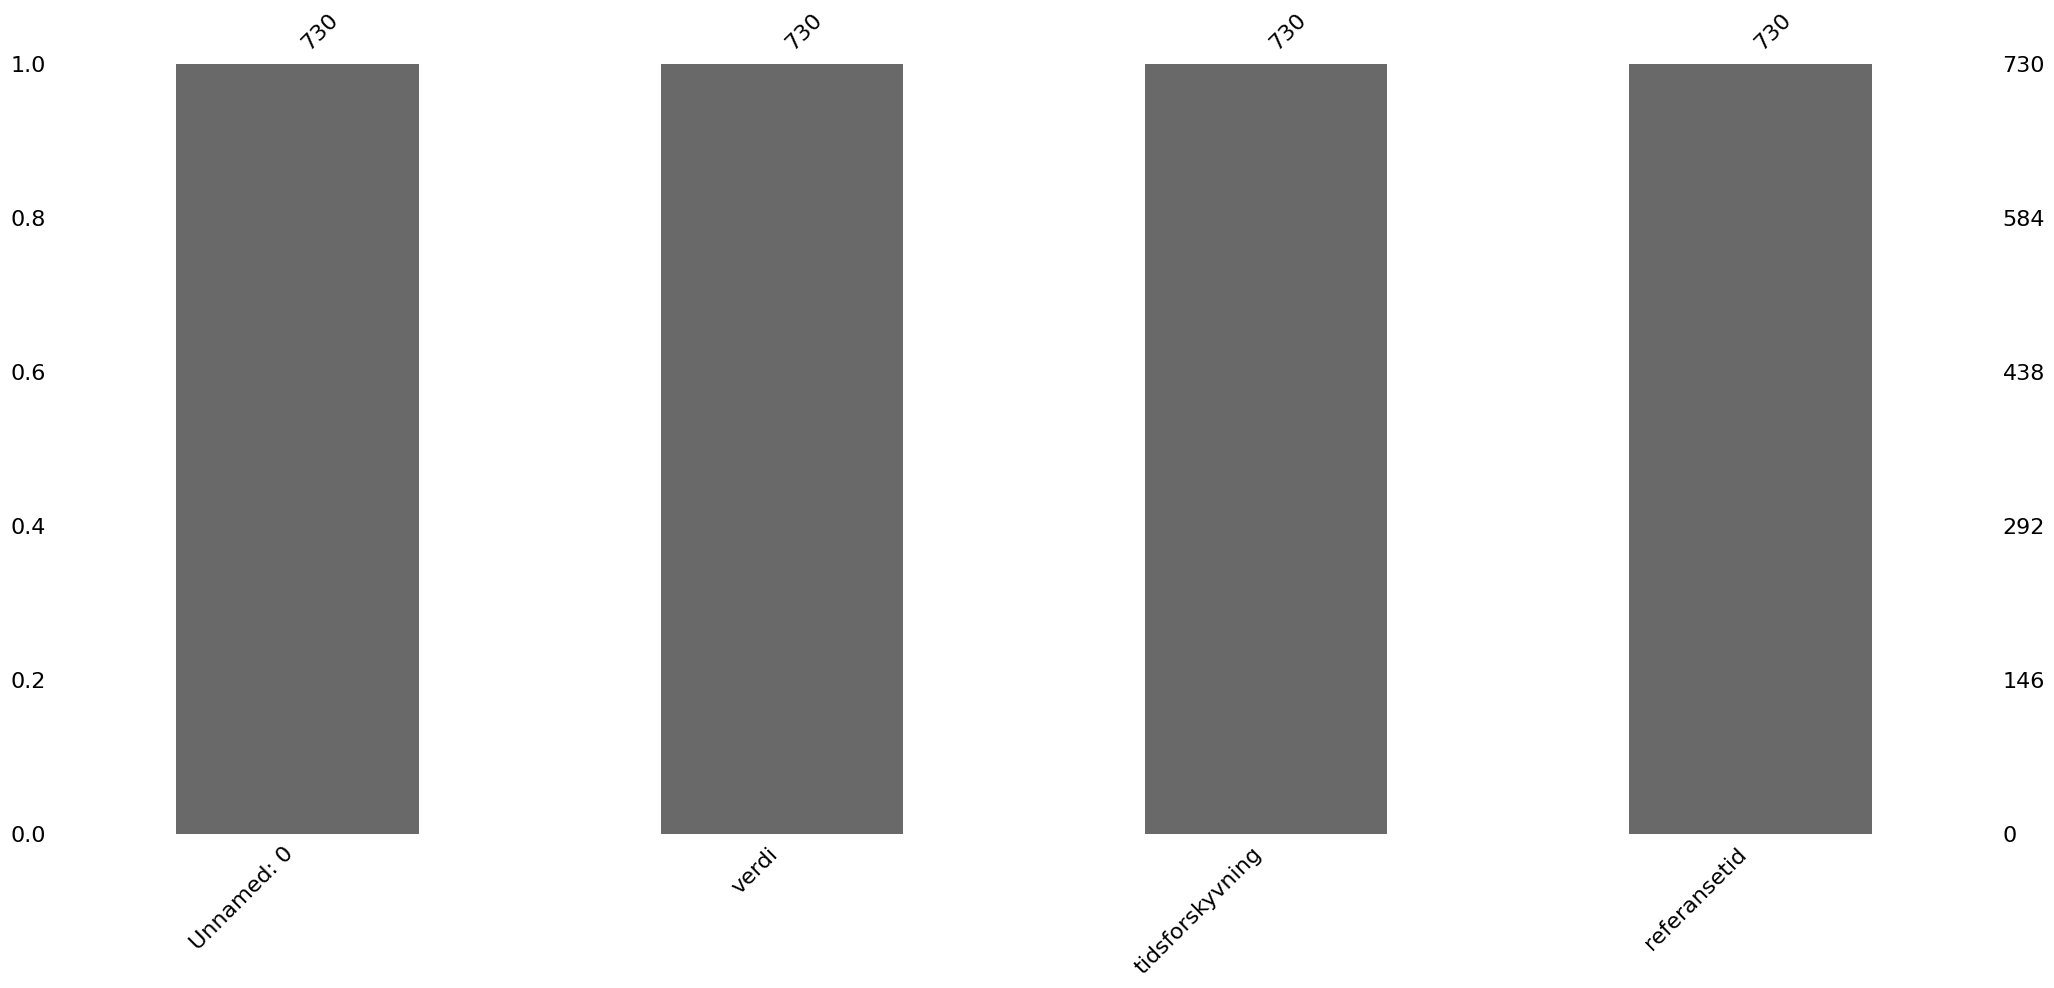

In [8]:
# se om det mangler noen tall i dataen
fc.missing_numbers(wind)

I dette datasettet er det ingen verdier som mangler. 

In [9]:
# Gjøre referansetid om til DateTime
wind['referansetid'] = pd.to_datetime(wind['referansetid'])

# Dataanalyse
Denne analysen skal gi grunnlaget for videre visualisering og predektiv analyse.
#### Median

In [10]:
# Medianen av datasettet
wind_median = fc.median(wind)

Medianen er 2.7


#### Gjennomsnitt

In [11]:
# Gjennomsnitt årlig av datasettet
avg_year = fc.average_year(wind)

Gjennomsnittlig verdi for datasettet er 3.04


In [12]:
# Gjennomsnitt månedlig av datasettet
avg_moth = fc.average_other(wind)
print(avg_moth)

måned
1     3.34
2     3.85
3     2.95
4     3.13
5     2.75
6     2.73
7     2.28
8     2.76
9     2.97
10    3.29
11    3.17
12    3.28
Name: verdi, dtype: float64


#### Standardavvik

In [13]:
# Standardavvik av datasettet
wind_std = fc.std(wind)

Standardavviket er 1.61


In [14]:
# Finner øvre og nedre grense med hjelp av standardavvik
fc.lower_upper_limit(wind)

Gjennomsnittlig verdi for datasettet er 3.04
Standardavviket er 1.61


(np.float64(-1.7828685660225219), np.float64(7.857389113967727))

# Visualisere data

I denne delen  skal gjøre dataen mere forståelig og tilgjenglig for et bredere publikum.

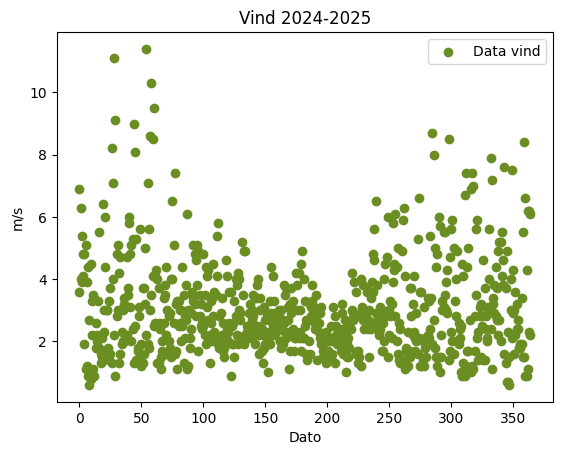

In [32]:
plt.scatter(wind['referansetid'], wind['verdi'], color = "olivedrab", label = 'Data vind')

plt.xlabel('Dato')
plt.ylabel('m/s')
plt.title('Vind 2024-2025')
plt.legend()

I denne grafen kan vi se at det er mest regn rundt frbruar og minst rundt juli, men dette kan visualiseres tydligere ved å definere månedende og finne gjennomsnittet. 

In [16]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des']

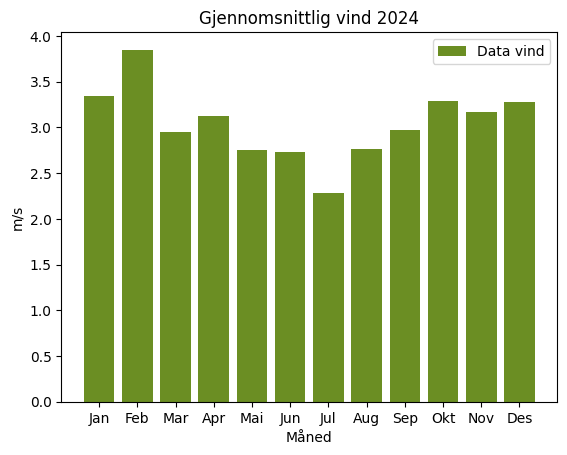

In [34]:
plt.bar(months, avg_moth, color = "olivedrab", label = 'Data vind')

plt.xlabel('Måned')
plt.ylabel('m/s')
plt.title('Gjennomsnittlig vind 2024')
plt.legend()


Ved å finne gjennomsnittet av hver måned kan vi med sikkerhet si at det er mest vind i februar og minst vind i juli. 

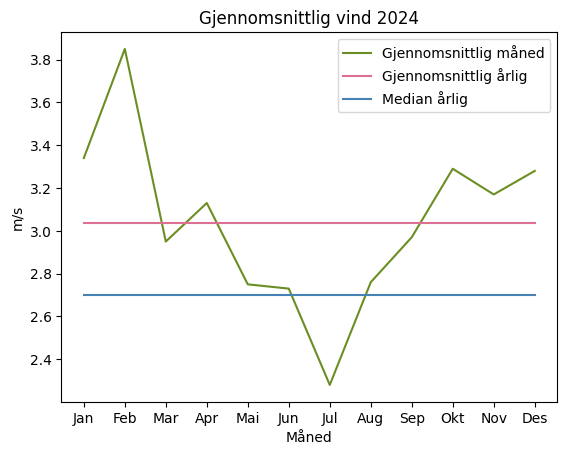

In [37]:
plt.plot(months, avg_moth, color = "olivedrab", label = 'Gjennomsnittlig måned')
plt.plot(months, avg_year*np.ones(len(months)), color = "palevioletred", label = 'Gjennomsnittlig årlig')
plt.plot(months, wind_median*np.ones(len(months)), color = "steelblue", label = 'Median årlig')

plt.xlabel('Måned')
plt.ylabel('m/s')
plt.title('Gjennomsnittlig vind 2024')
plt.legend()

I denne grafen er det også lagt inn årlig gjennomsitt og medianen av vind. Da kan vi se at det er i mars, april og september det blåser likest med gjennomsnittet årlig. Det er i juli og august det er likest med medianen. 

In [19]:
import plotly.express as px


fig = px.scatter(wind, x="referansetid", y="verdi")

# Prediktiv analyse
I denne delen skal vi ved hjelp fra scikit-learn forutse fremtidige miljøforhold basert på historisk data. 

In [20]:
X_train, X_test, y_train, y_test = fc.train_test_set(wind, 0.3)    


referansetid har fått labels
     Unnamed: 0  verdi tidsforskyvning  referansetid  måned
0             0    6.9            PT0H             0      1
1             1    6.3            PT0H             1      1
2             2    5.4            PT0H             2      1
3             3    4.8            PT0H             3      1
4             4    1.9            PT0H             4      1
..          ...    ...             ...           ...    ...
725         725    6.6            PT0H           360     12
726         726    4.3            PT0H           361     12
727         727    6.2            PT0H           362     12
728         728    6.2            PT0H           363     12
729         729    6.1            PT0H           364     12

[730 rows x 5 columns]
Datasettet er delt inn i train og test
Størrelsen på test er 0.3


koeffisienter: -0.00047338202751868617
konstantledd: 3.1702533211840165


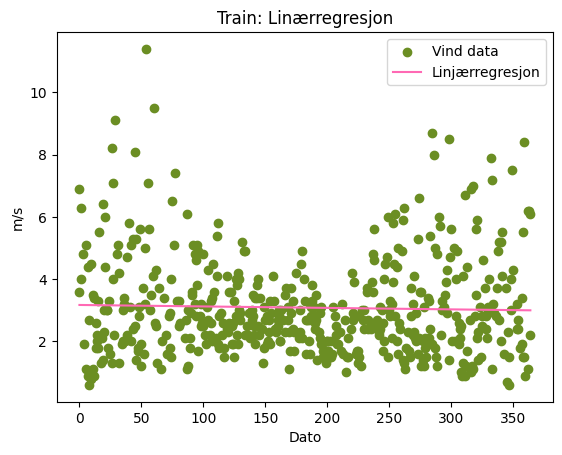

In [40]:
lin_pred = fc.linear(X_train, y_train)

plt.scatter(X_train, y_train, color = "olivedrab", label = 'Vind data')
plt.plot(X_train, lin_pred, color = "hotpink", label = 'Linjærregresjon')

plt.xlabel('Dato')
plt.ylabel('m/s')
plt.title('Train: Linærregresjon')
plt.legend()

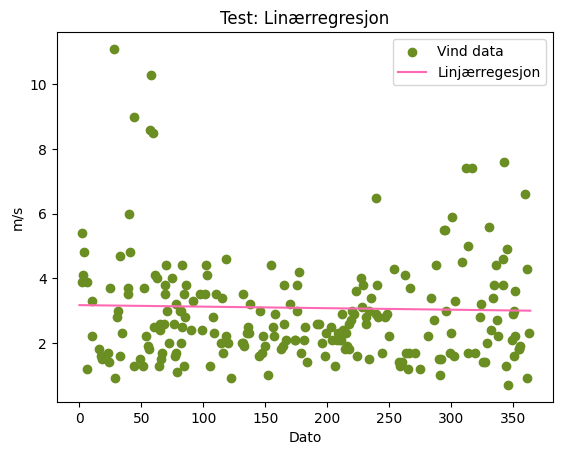

In [41]:
plt.scatter(X_test, y_test, color = "olivedrab", label = 'Vind data')
plt.plot(X_train, lin_pred, color = "hotpink", label = 'Linjærregesjon')

plt.xlabel('Dato')
plt.ylabel('m/s')
plt.title('Test: Linærregresjon')
plt.legend()

Linærregresjon

koeffisienter: -0.01024721767729114 2.6994688420134574e-05
konstantledd: 3.761528686421072


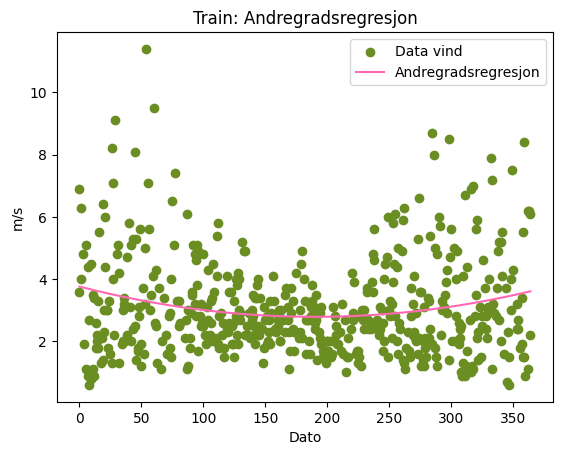

In [42]:
poly_pred = fc.poly(X_train, y_train)

plt.scatter(X_train, y_train, color = "olivedrab", label = 'Data vind')
plt.plot(X_train, poly_pred, color = "hotpink", label = 'Andregradsregresjon')

plt.xlabel('Dato')
plt.ylabel('m/s')
plt.title('Train: Andregradsregresjon')
plt.legend()

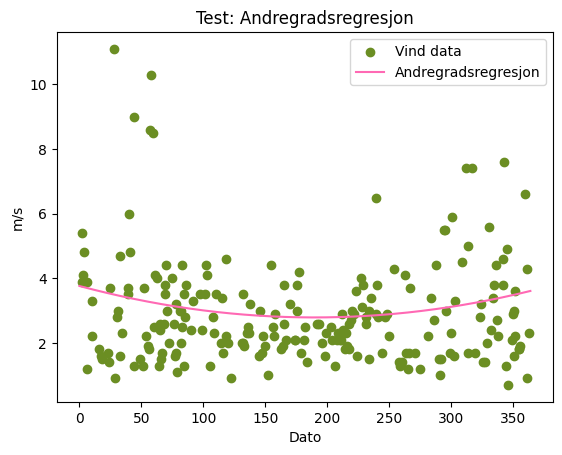

In [43]:
plt.scatter(X_test, y_test, color = "olivedrab", label = 'Vind data')
plt.plot(X_train, poly_pred, color = "hotpink", label = 'Andregradsregresjon')

plt.xlabel('Dato')
plt.ylabel('m/s')
plt.title('Test: Andregradsregresjon')
plt.legend()

Andregradsregresjon

In [26]:
print(mean_squared_error(y_train, lin_pred))
print(mean_squared_error(y_train, poly_pred))

2.540517958193774
2.4693250074553377


Det kvadratiske gjennomsnittet viser at begge reggresjonene passer like bra. 